Most libraries can be downloaded simply by running "using Pkg; Pkg.add("name")  
Gurobi library needs extra steps https://github.com/jump-dev/Gurobi.jl

In [1]:
using JuMP, Gurobi

JuMP (Julia for Mathematical Programming) - main library for interacting with LP solvers etc.  
I have used this tutorial to learn how to use JuMP with Gurobi
https://www.youtube.com/watch?v=v4sUP3F4GAw&t=641s but it turns out that JuMP provides unified interface to all supported solvers. 


In [2]:
using DataFrames, JSONTables, Distances #DataFrames is Julia's equivalent of Pandas

In [3]:
using GMT #Generic Mapping Tools for visualization of TSP

In [4]:
using Graphs, LinearAlgebra, SimpleWeightedGraphs, GraphsMatching, Multigraphs
#all the needed libraries for using graphs

Simple example to warm up

In [5]:
model = Model(Gurobi.Optimizer)
#set_optimizer_attribute(model, "TimeLimit", 100)
@variable(model, x[1:4] >= 0)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-04


4-element Vector{VariableRef}:
 x[1]
 x[2]
 x[3]
 x[4]

In [6]:
@objective(model, Max, 9*x[1]+5*x[2]+4*x[3]+x[4])

9 x[1] + 5 x[2] + 4 x[3] + x[4]

In [7]:
@constraints(model, begin
    2*x[1]+x[2]+x[3]+2*x[4] <= 2
    8*x[1]+4*x[2]-2*x[3]-x[4] >= 10
    4*x[1]+7*x[2]+2*x[3]+x[4] <= 4
end)

(2 x[1] + x[2] + x[3] + 2 x[4] ≤ 2.0, 8 x[1] + 4 x[2] - 2 x[3] - x[4] ≥ 10.0, 4 x[1] + 7 x[2] + 2 x[3] + x[4] ≤ 4.0)

In [8]:
JuMP.optimize!(model)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3 rows, 4 columns and 12 nonzeros
Model fingerprint: 0xad916a3e
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [1e+00, 9e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+01]
Presolve time: 0.00s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Infeasible or unbounded model

User-callback calls 32, time in user-callback 0.00 sec


In [9]:
solution_summary(model)

* Solver : Gurobi

* Status
  Result count       : 0
  Termination status : INFEASIBLE_OR_UNBOUNDED
  Message from the solver:
  "Model was proven to be either infeasible or unbounded. To obtain a more definitive conclusion, set the DualReductions parameter to 0 and reoptimize."

* Candidate solution (result #1)
  Primal status      : NO_SOLUTION
  Dual status        : NO_SOLUTION

* Work counters
  Solve time (sec)   : 2.04086e-04
  Barrier iterations : 0
  Node count         : 0


In [10]:
set_optimizer_attribute(model, "DualReductions", 0.0)
JuMP.optimize!(model)

Set parameter DualReductions to value 0
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3 rows, 4 columns and 12 nonzeros
Model fingerprint: 0xad916a3e
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [1e+00, 9e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 1e+01]
Presolve time: 0.00s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Infeasible model

User-callback calls 26, time in user-callback 0.00 sec


In [11]:
categories = ["calories", "protein", "fat", "sodium"]
minNutritionVal = [1800, 91, 0, 0]
minNutrition = Dict(zip(categories, minNutritionVal))
maxNutritionVal = [2200, Inf, 65, 1779]
maxNutrition = Dict(zip(categories, maxNutritionVal))

Dict{String, Float64} with 4 entries:
  "calories" => 2200.0
  "protein"  => Inf
  "fat"      => 65.0
  "sodium"   => 1779.0

In [12]:
foods = ["hamburger", "chicken", "hot dog", "fries",
         "macaroni", "pizza", "salad", "milk", "ice cream"]
costVal = [2.49, 2.89, 1.50, 1.89, 2.09, 1.99, 2.49, 0.89, 1.59]
cost = Dict(zip(foods, costVal))

Dict{String, Float64} with 9 entries:
  "hamburger" => 2.49
  "macaroni"  => 2.09
  "chicken"   => 2.89
  "fries"     => 1.89
  "hot dog"   => 1.5
  "salad"     => 2.49
  "ice cream" => 1.59
  "pizza"     => 1.99
  "milk"      => 0.89

In [13]:
nutritionValues = Dict(
("hamburger", "calories")=> 410,
("hamburger", "protein")=> 24,
("hamburger", "fat")=> 26,
("hamburger", "sodium")=> 730,
("chicken", "calories")=> 420,
("chicken", "protein")=> 32,
("chicken", "fat")=> 10,
("chicken", "sodium")=> 1190,
("hot dog", "calories")=> 560,
("hot dog", "protein")=> 20,
("hot dog", "fat")=> 32,
("hot dog", "sodium")=> 1800,
("fries", "calories")=> 380,
("fries", "protein")=> 4,
("fries", "fat")=> 19,
("fries", "sodium")=> 270,
("macaroni", "calories")=> 320,
("macaroni", "protein")=> 12,
("macaroni", "fat")=> 10,
("macaroni", "sodium")=> 930,
("pizza", "calories")=> 320,
("pizza", "protein")=> 15,
("pizza", "fat")=> 12,
("pizza", "sodium")=> 820,
("salad", "calories")=> 320,
("salad", "protein")=> 31,
("salad", "fat")=> 12,
("salad", "sodium")=> 1230,
("milk", "calories")=> 100,
("milk", "protein")=> 8,
("milk", "fat")=> 2.5,
("milk", "sodium")=> 125,
("ice cream", "calories")=> 330,
("ice cream", "protein")=> 8,
("ice cream", "fat")=> 10,
("ice cream", "sodium")=> 180)

Dict{Tuple{String, String}, Real} with 36 entries:
  ("hamburger", "fat")      => 26
  ("ice cream", "fat")      => 10
  ("pizza", "calories")     => 320
  ("salad", "protein")      => 31
  ("macaroni", "calories")  => 320
  ("macaroni", "protein")   => 12
  ("hot dog", "protein")    => 20
  ("hot dog", "calories")   => 560
  ("macaroni", "fat")       => 10
  ("ice cream", "calories") => 330
  ("salad", "sodium")       => 1230
  ("hamburger", "protein")  => 24
  ("macaroni", "sodium")    => 930
  ("hamburger", "sodium")   => 730
  ("hot dog", "sodium")     => 1800
  ("fries", "calories")     => 380
  ("pizza", "fat")          => 12
  ("milk", "fat")           => 2.5
  ("fries", "fat")          => 19
  ("chicken", "sodium")     => 1190
  ("ice cream", "sodium")   => 180
  ("fries", "sodium")       => 270
  ("chicken", "fat")        => 10
  ("fries", "protein")      => 4
  ("milk", "sodium")        => 125
  ⋮                         => ⋮

In [14]:
diet = Model(Gurobi.Optimizer)
for f in foods
    @variable(diet, base_name=f, lower_bound=0)
end


Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-04


In [15]:
for f in foods 
    println(f)
end

hamburger
chicken
hot dog
fries
macaroni
pizza
salad
milk
ice cream


In [16]:
obj = sum(variable_by_name(diet, foods[i]) * costVal[i] for i in 1:9)

2.49 hamburger + 2.89 chicken + 1.5 hot dog + 1.89 fries + 2.09 macaroni + 1.99 pizza + 2.49 salad + 0.89 milk + 1.59 ice cream

In [17]:
@objective(diet, Min, obj)

2.49 hamburger + 2.89 chicken + 1.5 hot dog + 1.89 fries + 2.09 macaroni + 1.99 pizza + 2.49 salad + 0.89 milk + 1.59 ice cream

In [18]:
for c in categories
    constr =sum(nutritionValues[foods[i], c]*variable_by_name(diet, foods[i]) for i in 1:9)
    @constraint(diet, (minNutrition[c] <=  constr <= maxNutrition[c]))
end

In [19]:
for ((f, i),c) in nutritionValues
    println(f," ", i, " ", c)
end

hamburger fat 26
ice cream fat 10
pizza calories 320
salad protein 31
macaroni calories 320
macaroni protein 12
hot dog protein 20
hot dog calories 560
macaroni fat 10
ice cream calories 330
salad sodium 1230
hamburger protein 24
macaroni sodium 930
hamburger sodium 730
hot dog sodium 1800
fries calories 380
pizza fat 12
milk fat 2.5
fries fat 19
chicken sodium 1190
ice cream sodium 180
fries sodium 270
chicken fat 10
fries protein 4
milk sodium 125
ice cream protein 8
salad calories 320
hot dog fat 32
salad fat 12
hamburger calories 410
chicken calories 420
milk calories 100
milk protein 8
pizza sodium 820
pizza protein 15
chicken protein 32


In [20]:
JuMP.optimize!(diet)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4 rows, 13 columns and 40 nonzeros
Model fingerprint: 0xd7d456fd
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [9e-01, 3e+00]
  Bounds range     [6e+01, 2e+03]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 4 rows, 10 columns, 37 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.472500e+02   0.000000e+00      0s
       4    1.1828861e+01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.182886111e+01

User-callback calls 48, time in user-callback 0.00 sec


In [21]:
objective_value(diet)

11.828861111111111

In [22]:
solution_summary(diet; verbose=true)

* Solver : Gurobi

* Status
  Result count       : 1
  Termination status : OPTIMAL
  Message from the solver:
  "Model was solved to optimality (subject to tolerances), and an optimal solution is available."

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : FEASIBLE_POINT
  Objective value    : 1.18289e+01
  Objective bound    : 1.18289e+01
  Dual objective value : 1.18289e+01
  Primal solution :
    chicken : 0.00000e+00
    fries : 0.00000e+00
    hamburger : 6.04514e-01
    hot dog : 0.00000e+00
    ice cream : 2.59132e+00
    macaroni : 0.00000e+00
    milk : 6.97014e+00
    pizza : 0.00000e+00
    salad : 0.00000e+00
  Dual solution :

* Work counters
  Solve time (sec)   : 4.46081e-04
  Barrier iterations : 0
  Node count         : 0


Actual solutions

In [23]:
file = read("./dataset.json")
jtable = jsontable(file)
df = DataFrame(jtable)

Row,geoname_id,name,ascii_name,alternate_names,feature_class,feature_code,country_code,cou_name_en,country_code_2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date,label_en,coordinates
,String,String,String?,Array…?,String,String,String,String?,String?,String?,String?,String?,String?,Int64,String?,Int64,String,String,String?,Object…
1,6534819,Cerreto Castello,Cerreto Castello,missing,P,PPLA3,IT,Italy,missing,12,BI,096087,missing,568,264,255,Europe/Rome,2019-03-08,Italy,"{\n ""lon"": 8.16082,\n ""lat"": 45.5645\n}"
2,6534828,Garbagnate Monastero,Garbagnate Monastero,missing,P,PPLA3,IT,Italy,missing,09,LC,097037,missing,2186,missing,301,Europe/Rome,2012-02-15,Italy,"{\n ""lon"": 9.30144,\n ""lat"": 45.7734\n}"
3,6534843,Monterosso Grana,Monterosso Grana,missing,P,PPLA3,IT,Italy,missing,12,CN,004139,missing,259,720,730,Europe/Rome,2014-01-11,Italy,"{\n ""lon"": 7.32293,\n ""lat"": 44.4082\n}"
4,6534893,Olivola,Olivola,missing,P,PPLA3,IT,Italy,missing,12,AL,006118,missing,92,280,270,Europe/Rome,2014-01-19,Italy,"{\n ""lon"": 8.36784,\n ""lat"": 45.0373\n}"
5,6534895,Pietra Marazzi,Pietra Marazzi,missing,P,PPLA3,IT,Italy,missing,12,AL,006129,missing,783,95,91,Europe/Rome,2014-01-11,Italy,"{\n ""lon"": 8.66854,\n ""lat"": 44.9427\n}"
6,6534936,Cassinetta di Lugagnano,Cassinetta di Lugagnano,missing,P,PPLA3,IT,Italy,missing,09,MI,015061,missing,1835,125,124,Europe/Rome,2014-01-16,Italy,"{\n ""lon"": 8.90604,\n ""lat"": 45.4225\n}"
7,6534955,Barbata,Barbata,missing,P,PPLA3,IT,Italy,missing,09,BG,016019,missing,586,105,103,Europe/Rome,2014-01-16,Italy,"{\n ""lon"": 9.77736,\n ""lat"": 45.475\n}"
8,6534980,Frascarolo,Frascarolo,missing,P,PPLA3,IT,Italy,missing,09,PV,018065,missing,1112,87,92,Europe/Rome,2014-01-16,Italy,"{\n ""lon"": 8.68204,\n ""lat"": 45.0467\n}"
9,6535007,Enego,Enego,missing,P,PPLA3,IT,Italy,missing,20,VI,024039,missing,1207,750,761,Europe/Rome,2014-01-11,Italy,"{\n ""lon"": 11.7055,\n ""lat"": 45.9416\n}"


In [24]:
function distance(row1, row2)
    pos1 = (row1["coordinates"]["lon"], row1["coordinates"]["lat"])
    pos2 = (row2["coordinates"]["lon"], row2["coordinates"]["lat"])
    haversine(pos1, pos2)/1000
end

distance (generic function with 1 method)

In [25]:
europe = filter(row -> occursin("Europe", row."timezone"), df)

Row,geoname_id,name,ascii_name,alternate_names,feature_class,feature_code,country_code,cou_name_en,country_code_2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date,label_en,coordinates
,String,String,String?,Array…?,String,String,String,String?,String?,String?,String?,String?,String?,Int64,String?,Int64,String,String,String?,Object…
1,6534819,Cerreto Castello,Cerreto Castello,missing,P,PPLA3,IT,Italy,missing,12,BI,096087,missing,568,264,255,Europe/Rome,2019-03-08,Italy,"{\n ""lon"": 8.16082,\n ""lat"": 45.5645\n}"
2,6534828,Garbagnate Monastero,Garbagnate Monastero,missing,P,PPLA3,IT,Italy,missing,09,LC,097037,missing,2186,missing,301,Europe/Rome,2012-02-15,Italy,"{\n ""lon"": 9.30144,\n ""lat"": 45.7734\n}"
3,6534843,Monterosso Grana,Monterosso Grana,missing,P,PPLA3,IT,Italy,missing,12,CN,004139,missing,259,720,730,Europe/Rome,2014-01-11,Italy,"{\n ""lon"": 7.32293,\n ""lat"": 44.4082\n}"
4,6534893,Olivola,Olivola,missing,P,PPLA3,IT,Italy,missing,12,AL,006118,missing,92,280,270,Europe/Rome,2014-01-19,Italy,"{\n ""lon"": 8.36784,\n ""lat"": 45.0373\n}"
5,6534895,Pietra Marazzi,Pietra Marazzi,missing,P,PPLA3,IT,Italy,missing,12,AL,006129,missing,783,95,91,Europe/Rome,2014-01-11,Italy,"{\n ""lon"": 8.66854,\n ""lat"": 44.9427\n}"
6,6534936,Cassinetta di Lugagnano,Cassinetta di Lugagnano,missing,P,PPLA3,IT,Italy,missing,09,MI,015061,missing,1835,125,124,Europe/Rome,2014-01-16,Italy,"{\n ""lon"": 8.90604,\n ""lat"": 45.4225\n}"
7,6534955,Barbata,Barbata,missing,P,PPLA3,IT,Italy,missing,09,BG,016019,missing,586,105,103,Europe/Rome,2014-01-16,Italy,"{\n ""lon"": 9.77736,\n ""lat"": 45.475\n}"
8,6534980,Frascarolo,Frascarolo,missing,P,PPLA3,IT,Italy,missing,09,PV,018065,missing,1112,87,92,Europe/Rome,2014-01-16,Italy,"{\n ""lon"": 8.68204,\n ""lat"": 45.0467\n}"
9,6535007,Enego,Enego,missing,P,PPLA3,IT,Italy,missing,20,VI,024039,missing,1207,750,761,Europe/Rome,2014-01-11,Italy,"{\n ""lon"": 11.7055,\n ""lat"": 45.9416\n}"


In [26]:
poland = filter(row -> occursin("PL", row."country_code"), europe)

Row,geoname_id,name,ascii_name,alternate_names,feature_class,feature_code,country_code,cou_name_en,country_code_2,admin1_code,admin2_code,admin3_code,admin4_code,population,elevation,dem,timezone,modification_date,label_en,coordinates
,String,String,String?,Array…?,String,String,String,String?,String?,String?,String?,String?,String?,Int64,String?,Int64,String,String,String?,Object…
1,753037,Żurowa,Zurowa,missing,P,PPL,PL,Poland,missing,77,1216,121616,missing,2321,missing,299,Europe/Warsaw,2010-10-17,Poland,"{\n ""lon"": 21.1689,\n ""lat"": 49.8264\n}"
2,754520,Wyśmierzyce,Wysmierzyce,"[""Vis'mezhice"", ""Vismezice"", ""Vismežice"", ""Vismjezhice"", ""Vysmezhice"", ""Wysmierzyce"", ""Wyśmierzyce"", ""wei xi mei ri cai"", ""Висмјежице"", ""Висьмежице"", ""Высмежице"", ""維希梅日采""]",P,PPLA3,PL,Poland,missing,78,1401,140106,missing,858,missing,124,Europe/Warsaw,2010-09-17,Poland,"{\n ""lon"": 20.8139,\n ""lat"": 51.6249\n}"
3,754847,Wólka Tanewska,Wolka Tanewska,missing,P,PPL,PL,Poland,missing,80,1812,181207,missing,1453,missing,171,Europe/Warsaw,2010-10-11,Poland,"{\n ""lon"": 22.2611,\n ""lat"": 50.5001\n}"
4,755572,Wiśniowa,Wisniowa,missing,P,PPL,PL,Poland,missing,77,1209,120909,missing,1900,missing,358,Europe/Warsaw,2010-09-10,Poland,"{\n ""lon"": 20.115,\n ""lat"": 49.7878\n}"
5,756048,Węgorzewo,Wegorzewo,"[""Angerburg"", ""Ungura"", ""Vengozevo"", ""Vengozhevo"", ""Vengoževo"", ""Wegobork"", ""Wegorzewo"", ""Węgobork"", ""Węgorzewo"", ""wen ge re wo"", ""Венгожево"", ""文戈熱沃""]",P,PPLA3,PL,Poland,missing,85,2819,281903,missing,11864,missing,120,Europe/Warsaw,2011-07-31,Poland,"{\n ""lon"": 21.7372,\n ""lat"": 54.2157\n}"
6,756197,Jodłówka-Wałki,Jodlowka-Walki,missing,P,PPL,PL,Poland,missing,77,1216,121609,missing,1119,missing,216,Europe/Warsaw,2010-10-17,Poland,"{\n ""lon"": 21.1333,\n ""lat"": 50.0499\n}"
7,757479,Szarów,Szarow,missing,P,PPL,PL,Poland,missing,77,1219,121903,missing,1337,missing,229,Europe/Warsaw,2010-10-17,Poland,"{\n ""lon"": 20.2696,\n ""lat"": 49.995\n}"
8,758467,Srokowo,Srokowo,"[""Drengfurth"", ""Dryfort"", ""Srokovo"", ""Srokowo"", ""Сроково""]",P,PPL,PL,Poland,missing,85,2808,280806,missing,1400,missing,92,Europe/Warsaw,2010-09-09,Poland,"{\n ""lon"": 21.5228,\n ""lat"": 54.2142\n}"
9,759399,Siedliska,Siedliska,missing,P,PPL,PL,Poland,missing,77,1216,121610,missing,2351,missing,241,Europe/Warsaw,2010-10-20,Poland,"{\n ""lon"": 20.9962,\n ""lat"": 49.8716\n}"


In [27]:
distance(poland[1, :], poland[2, :])

201.54734522151023

In [28]:
function create_naive_tsp(n::Integer, df, model=Gurobi.Optimizer)
    tsp = Model(model)
    
    #=
    using Dantzig–Fulkerson–Johnson formulation
    https://en.wikipedia.org/wiki/Travelling_salesman_problem#Integer_linear_programming_formulations
    However there is small difference between my solution and Wikipedia formulation:
    In Wikipedia at most one of edges ij and ji is taken
    I will force solution to use ij with ji at the same time
    =#
    @variable(tsp, x[1:n, 1:n], Bin, Symmetric)
    #adding binary variables x_ij meaning that tsp uses edge ij in solution
    #Symmetric -> edge ij is same as ji
    
    distances = [distance(df[i, :], df[j, :]) for i in 1:n, j in 1:n]
    
    #dot in .* means vectorized operator, in this case distance matrix is multiplied elementwise with variable matrix
    @objective(tsp, Min, sum(distances .* x)/2)
    
    #beacause of symmetry no need to differentiate columns and rows
    @constraint(tsp, [i in 1:n], sum(x[i, :]) == 2)
    
    @constraint(tsp, [i in 1:n], x[i, i] == 0)
    
    function powerset(x::Vector{T}) where T
        result = Vector{T}[[]]
        for elem in x, j in eachindex(result)
            push!(result, [result[j] ; elem])
        end
        result
    end
    
    allSubsets = powerset(Array(1:n))
    
    for s in allSubsets
        if length(s) > 1 && length(s) < n
            cart = Iterators.product(s, s) |> collect
            pairs = reshape(cart, length(cart))
            pairs = filter(x->x[1]<x[2], pairs)
            #println(pairs)
            @constraint(tsp, sum(tsp[:x][i, j] for (i, j) in pairs) <= length(s) - 1)
        end
    end
    
    return tsp
end

create_naive_tsp (generic function with 2 methods)

In [29]:
tsp = create_naive_tsp(20, europe)
set_time_limit_sec(tsp, 180.0)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-04
Set parameter TimeLimit to value 180


In [30]:
JuMP.optimize!(tsp)

Set parameter TimeLimit to value 180
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1048594 rows, 210 columns and 49807590 nonzeros
Model fingerprint: 0xeeacdc0d
Variable types: 0 continuous, 210 integer (210 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 4e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+01]
Found heuristic solution: objective 2756.7918205
Presolve removed 210 rows and 20 columns (presolve time = 8s) ...
Presolve removed 210 rows and 20 columns (presolve time = 14s) ...
Presolve removed 210 rows and 20 columns (presolve time = 20s) ...
Presolve removed 210 rows and 20 columns (presolve time = 20s) ...
Presolve removed 210 rows and 20 columns (presolve time = 26s) ...
Presolve removed 210 rows and 20 columns (

In [31]:
solution_summary(tsp; verbose=true)

* Solver : Gurobi

* Status
  Result count       : 2
  Termination status : OPTIMAL
  Message from the solver:
  "Model was solved to optimality (subject to tolerances), and an optimal solution is available."

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : NO_SOLUTION
  Objective value    : 1.26116e+03
  Objective bound    : 1.26116e+03
  Relative gap       : 0.00000e+00
  Dual objective value : 1.26116e+03
  Primal solution :
    x[1,10] : -0.00000e+00
    x[1,11] : -0.00000e+00
    x[1,12] : -0.00000e+00
    x[1,13] : -0.00000e+00
    x[1,14] : -0.00000e+00
    x[1,15] : -0.00000e+00
    x[1,16] : -0.00000e+00
    x[1,17] : -0.00000e+00
    x[1,18] : -0.00000e+00
    x[1,19] : -0.00000e+00
    x[1,1] : 0.00000e+00
    x[1,20] : 1.00000e+00
    x[1,2] : -0.00000e+00
    x[1,3] : 0.00000e+00
    x[1,4] : 0.00000e+00
    x[1,5] : -0.00000e+00
    x[1,6] : 1.00000e+00
    x[1,7] : -0.00000e+00
    x[1,8] : -0.00000e+00
    x[1,9] : -0.00000e

In [32]:
#works for 20 vertices in 142 secs

In [33]:
value.(tsp[:x])

20×20 Matrix{Float64}:
  0.0  -0.0   0.0   0.0  -0.0   1.0  …  -0.0  -0.0  -0.0  -0.0  -0.0   1.0
 -0.0   0.0  -0.0  -0.0  -0.0   0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
  0.0  -0.0   0.0   1.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0   1.0
  0.0  -0.0   1.0   0.0   1.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0   1.0   0.0  -0.0      0.0  -0.0  -0.0  -0.0  -0.0  -0.0
  1.0   0.0  -0.0  -0.0  -0.0   0.0  …  -0.0   0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0   0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0   0.0   1.0  -0.0     -0.0   1.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0   0.0   1.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0   1.0  -0.0  -0.0
 -0.0   1.0  -0.0  -0.0  -0.0   1.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0   1.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0   1.0  -0.0
 -0.0   0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0   1.0  -0.0  -0.0  -0.0
 -

In [34]:
lon = map(x->x[:lon], df[!,"coordinates"][1:6])
lat = map(x->x[:lat], df[!,"coordinates"][1:6])

6-element Vector{Float64}:
 45.56446
 45.77338
 44.40823
 45.03725
 44.94265
 45.42247

In [35]:
function path(matrix, n, df)
    prev = 0
    cur = 1
    lon = map(x->x[:lon], df[!,"coordinates"][1:n])
    lat = map(x->x[:lat], df[!,"coordinates"][1:n])
    x = zeros(Float64, (n+1,))
    y = zeros(Float64, (n+1,))
    for j in 1:n
        for i in 1:n
            if round(matrix[cur,i];digits=0)==1.0 && i!=prev
                x[j] = lon[cur]
                y[j] = lat[cur]
                prev = cur
                cur = i
                break
            end
        end
    end
    x[n+1]=x[1]
    y[n+1]=y[1]
    println(x)
    x,y
end

path (generic function with 1 method)

In [36]:
value.(tsp[:x])

20×20 Matrix{Float64}:
  0.0  -0.0   0.0   0.0  -0.0   1.0  …  -0.0  -0.0  -0.0  -0.0  -0.0   1.0
 -0.0   0.0  -0.0  -0.0  -0.0   0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
  0.0  -0.0   0.0   1.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0   1.0
  0.0  -0.0   1.0   0.0   1.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0   1.0   0.0  -0.0      0.0  -0.0  -0.0  -0.0  -0.0  -0.0
  1.0   0.0  -0.0  -0.0  -0.0   0.0  …  -0.0   0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0   0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0   0.0   1.0  -0.0     -0.0   1.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0   0.0   1.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0   1.0  -0.0  -0.0
 -0.0   1.0  -0.0  -0.0  -0.0   1.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0   1.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0   1.0  -0.0
 -0.0   0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0   1.0  -0.0  -0.0  -0.0
 -

In [37]:
lon,lat=path(value.(tsp[:x]),20, europe)

[8.16082, 8.90604, 9.23954, 9.30144, 9.90885, 11.20751, 11.7055, 12.15514, 11.073, 10.01066, 9.77736, 9.70586, 9.69476, 9.25656, 9.16725, 8.68204, 8.66854, 8.36784, 7.32293, 7.65552, 8.16082]


([8.16082, 8.90604, 9.23954, 9.30144, 9.90885, 11.20751, 11.7055, 12.15514, 11.073, 10.01066  …  9.70586, 9.69476, 9.25656, 9.16725, 8.68204, 8.66854, 8.36784, 7.32293, 7.65552, 8.16082], [45.56446, 45.42247, 45.75878, 45.77338, 45.72722, 46.11805, 45.94161, 43.79116, 44.99498, 45.47728  …  45.53148, 45.40217, 44.99446, 45.06986, 45.04666, 44.94265, 45.03725, 44.40823, 45.41745, 45.56446])

Map visualizations act as sanity checks

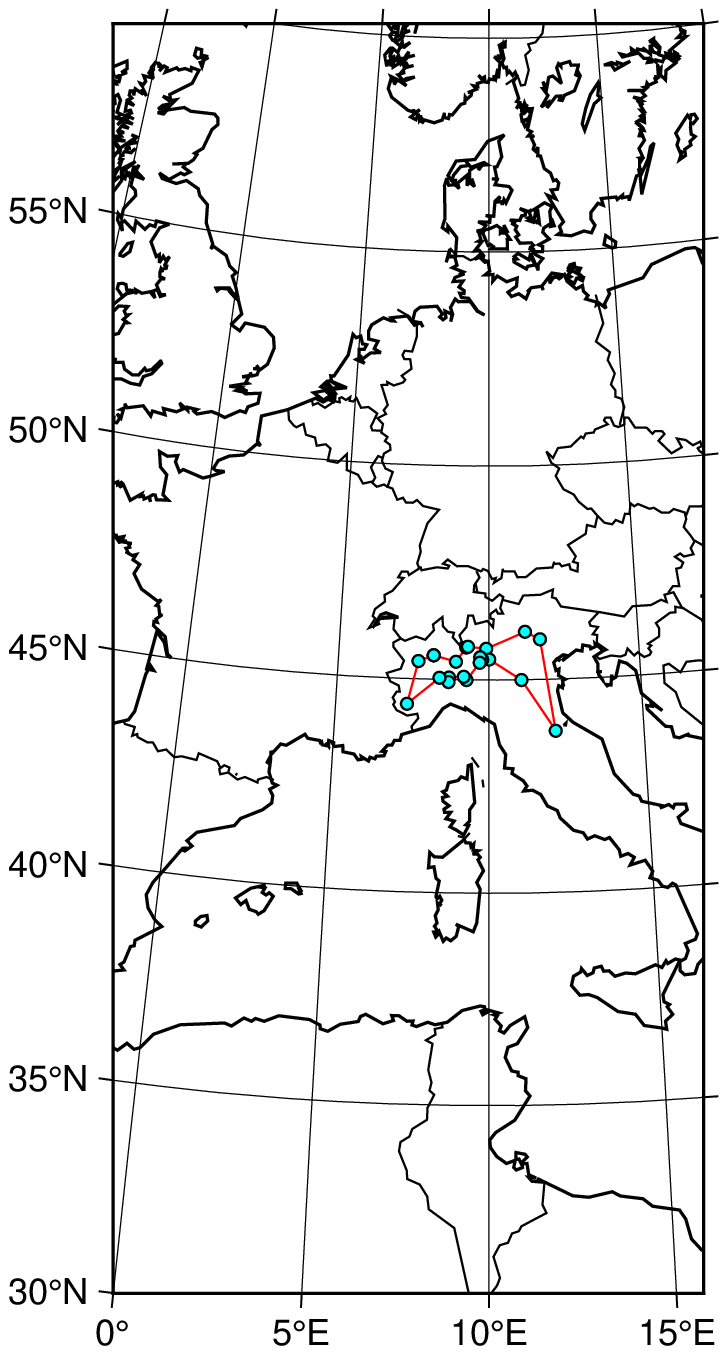

In [38]:
coast(
    region="0/30/20/60+r", 
    proj=(name=:laea, center=[10,50]), 
    frame=:ag, 
    res=:low,
    area=500, 
    shore=:thin, 
    borders=1,
    
    figsize=5
)
GMT.scatter!(
    lon, lat, 
    fmt=:png, 
    marker=:circle,
    markeredgecolor=0, 
    lc=:red,
    size=0.1, 
    markerfacecolor=:cyan, 
    show=true
)

In [39]:
#lazy row generation
function find_subtour(matrix, n)
    #works because each vertex has degree equal to 2
    vis = zeros(Bool, (n,))
    x = []
    best = collect(1:n)
    lenmax = length(best)
    for start in 1:n
        if !vis[start]
            cur = start
            vis[start]= true
            x = [start]
            while true
                modified = false
                for i in 1:n
                    if round(matrix[cur, i];digits=0) == 1.0 && !vis[i]
                        modified = true
                        cur = i
                        vis[cur]= true
                        push!(x, cur)
                        break
                    end
                end

                if !modified
                    if length(x) < lenmax
                        lenmax = length(x)
                        best = x
                    end
                    break
                end
            end

        end
    end
    return best
end


find_subtour (generic function with 1 method)

In [40]:
value.(tsp[:x])
find_subtour(value.(tsp[:x]), 6)

1-element Vector{Int64}:
 2

In [41]:
function create_lazy_tsp(n::Integer, df, model=Gurobi.Optimizer)
    tsp = Model(model)
    
    @variable(tsp, x[1:n, 1:n], Bin, Symmetric)

    distances = [distance(df[i, :], df[j, :]) for i in 1:n, j in 1:n]
    
    @objective(tsp, Min, sum(distances .* x)/2)
    
    @constraint(tsp, [i in 1:n], sum(x[i, :]) == 2)
    
    @constraint(tsp, [i in 1:n], x[i, i] == 0)
    
    
    return tsp
end

create_lazy_tsp (generic function with 2 methods)

In [42]:
#lets use callbacks to lazy generate constraints
lazy_tsp = create_lazy_tsp(230, europe)
set_time_limit_sec(lazy_tsp, 180.0)
function subtour_callback(data)
    #callback are explained well in JuMP's docs
    #MOI (Mathematical Optimization Interfaces) handles all solver specific APIs
    status = callback_node_status(data, lazy_tsp)
    if status != MOI.CALLBACK_NODE_STATUS_INTEGER
        return
    end
    n = size(lazy_tsp[:x])[1]
    tour = find_subtour(callback_value.(data, lazy_tsp[:x]), n)

    if length(tour) in [1, n]
        return
    end
    cart = Iterators.product(tour, tour) |> collect
    pairs = reshape(cart, length(cart))
    pairs = filter(x->x[1]<x[2], pairs)
    con = @build_constraint(sum(lazy_tsp[:x][i, j] for (i, j) in pairs) <= length(tour) - 1)
    
    MOI.submit(lazy_tsp, MOI.LazyConstraint(data), con)
    return
end

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-04
Set parameter TimeLimit to value 180


subtour_callback (generic function with 1 method)

In [43]:
MOI.set(lazy_tsp, MOI.LazyConstraintCallback(), subtour_callback)
optimize!(lazy_tsp)


Set parameter TimeLimit to value 180
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: Intel(R) Core(TM) i5-10210U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 460 rows, 26565 columns and 53130 nonzeros
Model fingerprint: 0xd1b214fd
Variable types: 0 continuous, 26565 integer (26565 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 3e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 2e+00]
Presolve removed 230 rows and 230 columns
Presolve time: 0.03s
Presolved: 230 rows, 26335 columns, 52670 nonzeros
Variable types: 0 continuous, 26335 integer (26335 binary)

Root relaxation: objective 1.222173e+04, 309 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

In [44]:
#20 cities in 0.07
#230 in 62secs
solution_summary(lazy_tsp)

* Solver : Gurobi

* Status
  Result count       : 4
  Termination status : OPTIMAL
  Message from the solver:
  "Model was solved to optimality (subject to tolerances), and an optimal solution is available."

* Candidate solution (result #1)
  Primal status      : FEASIBLE_POINT
  Dual status        : NO_SOLUTION
  Objective value    : 1.40772e+04
  Objective bound    : 1.40772e+04
  Relative gap       : 0.00000e+00
  Dual objective value : 1.40772e+04

* Work counters
  Solve time (sec)   : 5.80892e+01
  Barrier iterations : 0
  Node count         : 35348


In [45]:
res = value.(lazy_tsp[:x])

230×230 Matrix{Float64}:
  0.0  -0.0  -0.0  -0.0  -0.0  -0.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0   0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0   0.0   0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0   0.0   0.0   1.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0   1.0   0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0   0.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0   1.0   0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0   1.0  -0.0  -0.0  -0.0  -0.0  …  -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0
 -0.0  -0.0  -0.0  -0.0  -0.0  -0.0     -0.0  -0.0  -0.0  -0.0  -0.0  -0.0


In [46]:
lon,lat=path(value.(lazy_tsp[:x]),230,europe)

[8.16082, 7.99552, 7.83372, 7.77942, 7.65552, 7.39561, 7.49642, 7.5067, 7.32293, 8.22714, 8.33315, 8.49265, 8.75865, 8.66854, 8.36784, 8.68204, 9.16725, 9.25656, 9.69476, 9.77736, 9.70586, 9.90885, 10.03907, 10.01066, 10.40227, 10.7125, 11.20751, 11.22565, 12.58398, 11.7055, 11.85605, 12.05443, 12.08282, 11.82425, 11.61178, 11.33262, 10.74271, 11.073, 10.98087, 10.91743, 10.43169, 10.43015, 10.30706, 10.31798, 10.37106, 10.64896, 10.65824, 10.78754, 12.14305, 12.15514, 12.69863, 13.46261, 13.98311, 13.83953, 13.30092, 12.64311, 12.56582, 12.58518, 12.555, 12.69161, 13.21316, 13.79258, 14.75184, 14.26321, 14.08276, 8.56771, 8.98983, 12.70911, 12.69303, 14.20361, 14.36222, 14.51833, 15.25077, 15.41429, 16.25661, 19.22139, 19.51653, 20.94517, 21.69306, 21.37944, 22.50141, 22.41278, 28.04734, 22.7871, 22.51554, 22.26113, 23.43375, 22.46756, 22.78487, 25.26855, 26.00177, 26.17579, 26.44238, 25.36147, 24.52232, 23.12455, 21.95721, 23.53333, 21.92343, 21.7372, 21.52282, 20.81394, 20.25836, 21

([8.16082, 7.99552, 7.83372, 7.77942, 7.65552, 7.39561, 7.49642, 7.5067, 7.32293, 8.22714  …  9.23954, 9.14054, 9.11104, 9.00424, 8.90604, 8.79978, 8.51403, 8.37752, 8.10571, 8.16082], [45.56446, 45.49266, 45.46776, 45.49026, 45.41745, 45.29485, 45.16225, 45.00115, 44.40823, 44.73994  …  45.75878, 45.80068, 45.76298, 45.65727, 45.42247, 45.60425, 45.57597, 45.84577, 45.61239, 45.56446])

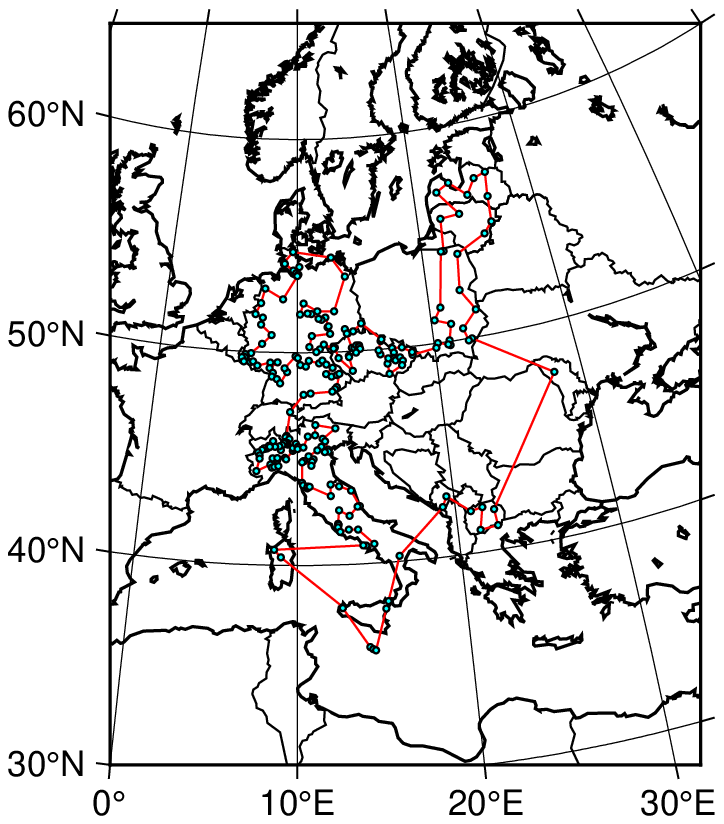

In [47]:
coast(
    region="0/30/50/60+r", 
    proj=(name=:laea, center=[10,50]), 
    frame=:ag, 
    res=:low,
    area=500, 
    shore=:thin, 
    borders=1,
    
    figsize=5
)
GMT.scatter!(
    lon, lat, 
    fmt=:png, 
    marker=:circle,
    markeredgecolor=0, 
    lc=:red,
    size=0.05, 
    markerfacecolor=:cyan, 
    show=true
)

In [48]:
#Christofides
function Christofides(n::Integer, df)
    distances = [distance(df[i, :], df[j, :]) for i in 1:n, j in 1:n]
    myGraph = SimpleWeightedGraph(distances)
    #MST
    emst = Graphs.kruskal_mst(myGraph)
    sources = map(src, emst)
    dests = map(dst, emst)
    weig = map(weight, emst)
    mst = SimpleWeightedGraph(sources, dests, weig)
    #Odd
    odds = [i for i in 1:n if (Graphs.degree(mst, i)%2 == 1)]
    ind, mapping = Graphs.induced_subgraph(myGraph, odds)
    weigh = weights(ind)
    ind = Graph(ind)
    numv = nv(ind)
    #minimum weight perfect matching
    dictt = Dict([(e=>weigh[src(e),dst(e)]) for e in edges(ind)])
    #minimum_weight_perfect_matching uses BlossomV solver written in C++
    match = minimum_weight_perfect_matching(ind, dictt)
    matches = [(mapping[i], mapping[match.mate[i]]) for i in 1:length(match.mate)]
    Match_weights = reshape([(i, j) in matches ? distances[i,j] : 0.0 for i in 1:n for j in 1:n], (n,n,))
    #multigraph
    TM = adjacency_matrix(Graph(Match_weights)) + adjacency_matrix(Graph(mst))
    H = Multigraph(TM)
    #euler
    startstop = [i for i in 1:n if sum( adjacency_matrix(H)[i, :])%2==1]
    s = length(startstop)==0 ? 1 : starstop[1]
    #implementation of Eulerian Circuit from Python's NetworkX
    vstack = [s]
    last_vertex = -1
    res = []
    while length(vstack)>0
        cur = vstack[length(vstack)]
        if degree(H, cur) == 0
            if last_vertex != -1
                push!(res, last_vertex)
            end
            last_vertex = cur
            pop!(vstack)
        else
            nei = neighbors(H, cur)
            next = nei[1]#arbitrary choice
            push!(vstack, next)
            Graphs.rem_edge!(H, cur, next, 1)
        end
    end
    #hamiltonian
    vis = zeros(Bool, (n,))
    hamiltonian = []
    for i in 1:length(res)
        if !vis[res[i]]
            push!(hamiltonian, res[i])
            vis[res[i]]=true
        end
    end
    hamiltonian
end

Christofides (generic function with 1 method)

In [49]:
@time order = Christofides(500, europe)
#0.5 secs for 220
#0.5 secs for 500
#2 minutes for 5000

  5.264882 seconds (15.44 M allocations: 750.791 MiB, 2.88% gc time, 89.14% compilation time)


500-element Vector{Any}:
   1
  78
  35
  21
  23
  20
  43
  22
  52
   3
 261
 259
 263
   ⋮
  27
  26
  25
   4
   6
  74
  41
  39
  40
  11
  24
  38

In [50]:
function from_order(order, n, df)
    lon = map(x->convert(Float64, df[!,"coordinates"][x][:lon]), order)
    lat = map(x->convert(Float64, df[!,"coordinates"][x][:lat]), order)
    push!(lon, lon[1])
    push!(lat, lat[1])
    lon,lat
end
lon,lat = from_order(order, 500, europe)

([8.16082, 8.10571, 7.99552, 7.83372, 7.77942, 7.65552, 7.39561, 7.49642, 7.5067, 7.32293  …  8.36784, 8.90604, 8.79978, 9.00424, 9.11104, 9.14054, 9.23954, 8.51403, 8.37752, 8.16082], [45.56446, 45.61239, 45.49266, 45.46776, 45.49026, 45.41745, 45.29485, 45.16225, 45.00115, 44.40823  …  45.03725, 45.42247, 45.60425, 45.65727, 45.76298, 45.80068, 45.75878, 45.57597, 45.84577, 45.56446])

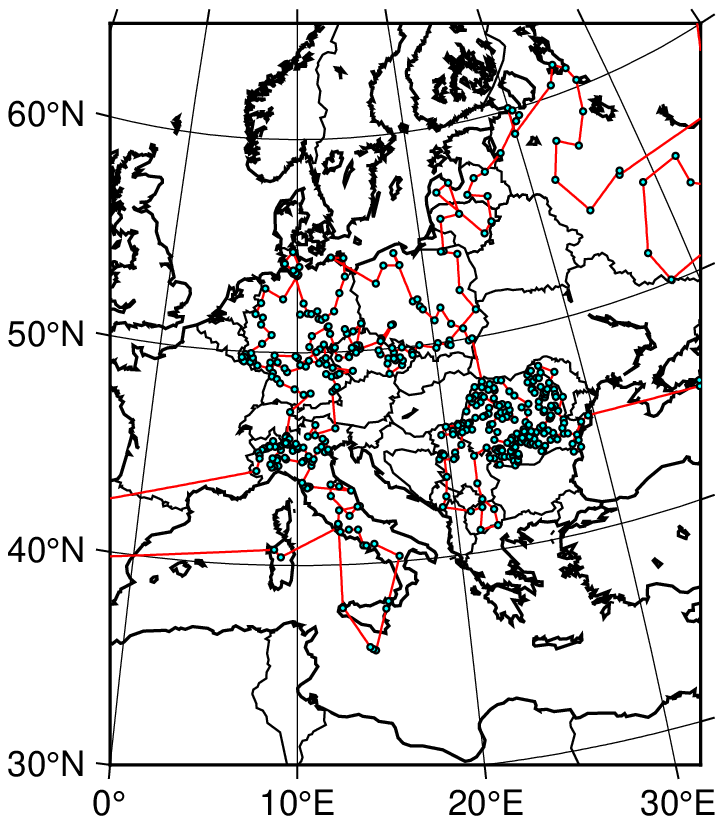

In [51]:
coast(
    region="0/30/50/60+r", 
    proj=(name=:laea, center=[10,50]), 
    frame=:ag, 
    res=:low,
    area=500, 
    shore=:thin, 
    borders=1,
    
    figsize=5
)
GMT.scatter!(
    lon, lat, 
    fmt=:png, 
    marker=:circle,
    markeredgecolor=0, 
    lc=:red,
    size=0.05, 
    markerfacecolor=:cyan, 
    show=true
)